In [8]:
! pip install import-ipynb

['Asian Koel', 'Black Kite', 'Black-breasted Parrotbill', 'Black-necked crane', 'Bristled Grassbird', 'Cheer Pheasant', 'Common Cuckoo', 'Common Pochard', 'Common Wood Pigeon', 'Eastern Imperial Eagle', 'Egyptian Vulture', 'Great Slaty Woodpecker', 'Greater Spotted Eagle', 'Grey Treepie', 'Grey-crowned Prinia', 'Grey-sided Thrush', 'Himalayan Monal', 'House Crow', 'House Sparrow', 'Indian Spotted Eagle', 'Jerdon_s Babbler', 'Kashmir Flycatcher', 'Large-billed Crow', 'Long-tailed Duck', 'Pallas_s Fish Eagle', 'Red-billed Blue Magpie', 'Rose-ringed Parakeet', 'Rufous Treepie', 'Rufous-necked Hornbill', 'Rustic Bunting', 'Saker Falcon', 'Sarus Crane', 'Satyr Tragopan', 'Slender-billed Babbler', 'Spiny Babbler', 'Spotted Dove', 'Steppe Eagle', 'Swamp Francolin', 'Swamp Grass-babbler', 'White-throated Bushchat', 'Wood Snipe']
{'XC161198 1': 'Asian Koel', 'XC162828 0': 'Asian Koel', 'XC179229 8': 'Asian Koel', 'XC182810 0': 'Asian Koel', 'XC196583 0': 'Asian Koel', 'XC196584 1': 'Asian Koel'

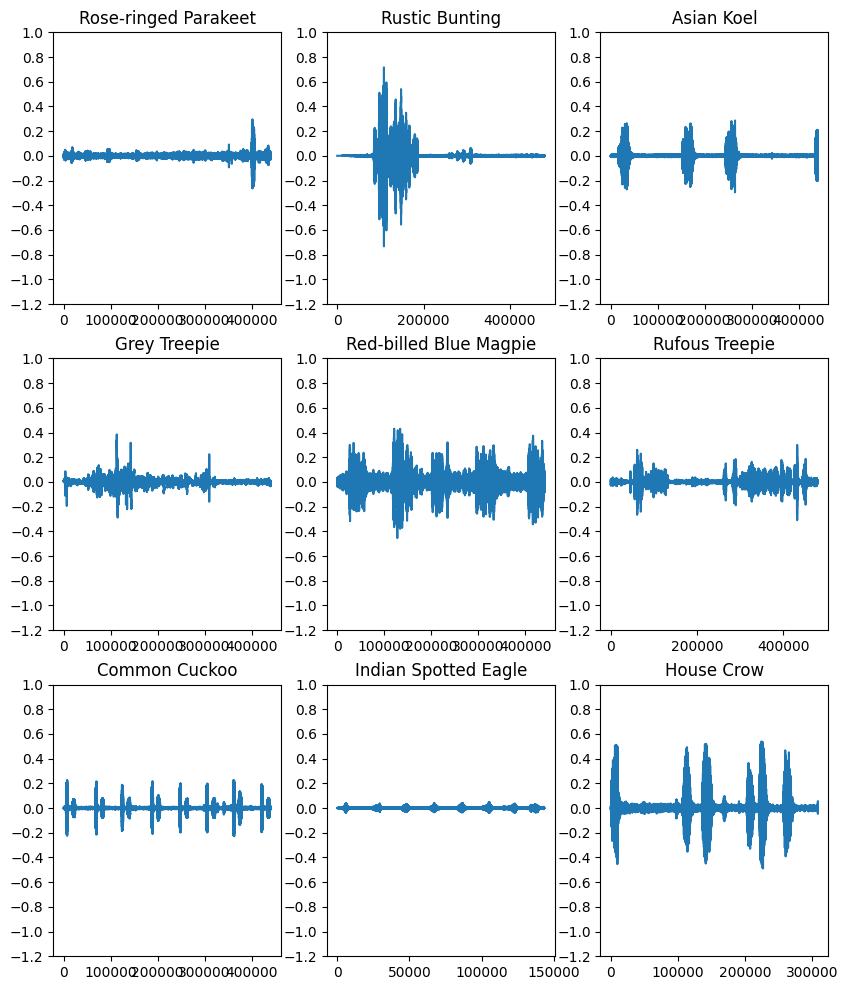

Label: Rose-ringed Parakeet
Waveform shape: (441000,)
Spectrogram shape: (124, 129, 1)
tf.Tensor(
[[[7.2056577e-02]
  [2.5333000e-02]
  [1.1697054e-01]
  ...
  [2.6055024e-05]
  [7.2708681e-05]
  [8.0209225e-05]]

 [[6.8207115e-02]
  [3.3736190e-01]
  [5.4210901e-01]
  ...
  [2.8047607e-05]
  [3.0130870e-05]
  [6.5080822e-06]]

 [[9.6328989e-02]
  [4.1255614e-01]
  [4.4665581e-01]
  ...
  [3.2263772e-05]
  [3.4946403e-05]
  [2.4985522e-05]]

 ...

 [[1.6204587e-01]
  [2.2611159e-01]
  [3.7614623e-01]
  ...
  [3.4087425e-05]
  [3.3030228e-05]
  [5.0246716e-05]]

 [[9.0587944e-02]
  [2.1356533e-01]
  [2.2028787e-01]
  ...
  [5.1118743e-05]
  [4.8270729e-05]
  [3.2778829e-05]]

 [[3.4169570e-02]
  [4.7097197e-01]
  [3.9541265e-01]
  ...
  [5.2296011e-05]
  [4.6002548e-05]
  [3.9530918e-05]]], shape=(124, 129, 1), dtype=float32)
15996
[    0   130   260   390   520   650   780   910  1040  1170  1300  1430
  1560  1690  1820  1950  2080  2210  2340  2470  2600  2731  2861  2991
  3121  325

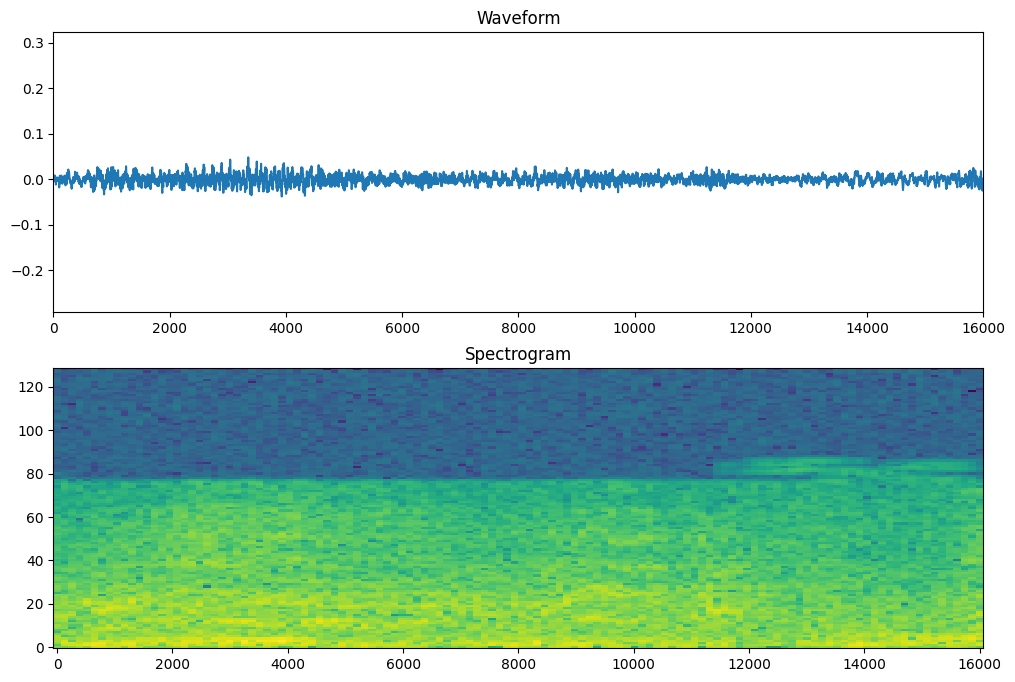

15996
[    0   130   260   390   520   650   780   910  1040  1170  1300  1430
  1560  1690  1820  1950  2080  2210  2340  2470  2600  2731  2861  2991
  3121  3251  3381  3511  3641  3771  3901  4031  4161  4291  4421  4551
  4681  4811  4941  5071  5201  5332  5462  5592  5722  5852  5982  6112
  6242  6372  6502  6632  6762  6892  7022  7152  7282  7412  7542  7672
  7802  7932  8063  8193  8323  8453  8583  8713  8843  8973  9103  9233
  9363  9493  9623  9753  9883 10013 10143 10273 10403 10533 10664 10794
 10924 11054 11184 11314 11444 11574 11704 11834 11964 12094 12224 12354
 12484 12614 12744 12874 13004 13134 13264 13395 13525 13655 13785 13915
 14045 14175 14305 14435 14565 14695 14825 14955 15085 15215 15345 15475
 15605 15735 15865 15996]
[    0   130   260   390   520   650   780   910  1040  1170  1300  1430
  1560  1690  1820  1950  2080  2210  2340  2470  2600  2731  2861  2991
  3121  3251  3381  3511  3641  3771  3901  4031  4161  4291  4421  4551
  4681  4811  4941 

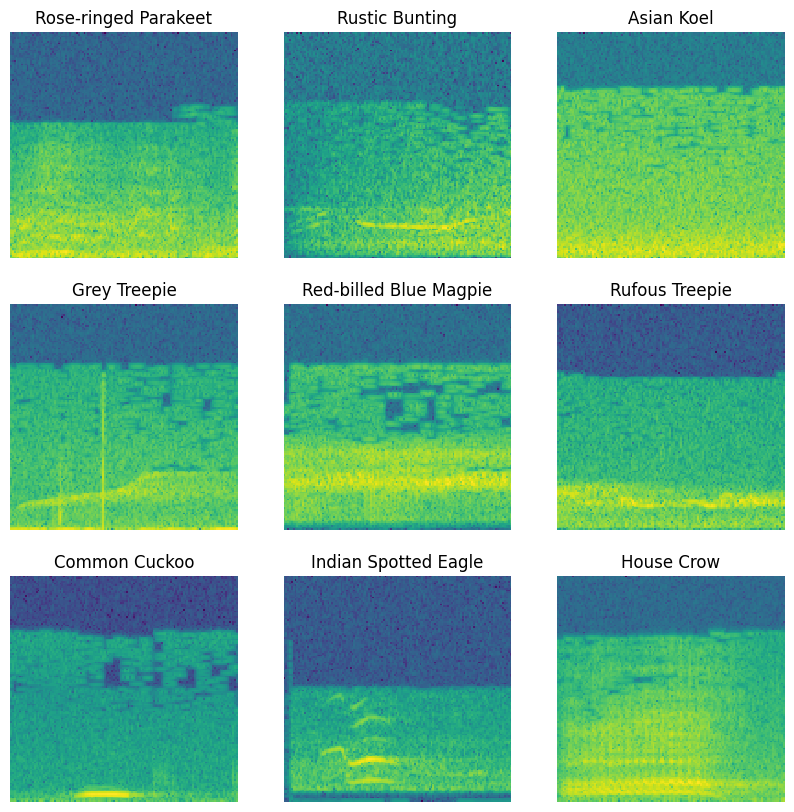

Tensor("strided_slice:0", shape=(), dtype=string)
shape: (None, None)
Tensor("strided_slice:0", shape=(), dtype=string)
shape: (None, None)


In [12]:
%run extractAudio.ipynb

In [13]:
from tensorflow import keras
from keras import layers
from keras import models

# Instantiate the `tf.keras.layers.Normalization` layer.
norm_layer = layers.Normalization()
# Fit the state of the layer to the spectrograms
# with `Normalization.adapt`.
norm_layer.adapt(data=spectrogram_ds.map(map_func=lambda spec, label: spec))

model = models.Sequential(
    [
        layers.Input(shape=input_shape),
        # Downsample the input.
        layers.Resizing(32, 32),
        # Normalize.
        norm_layer,
        # Plus de conv, + de max pulling, + de dense, + grabd nm
        layers.Conv2D(32, 3, activation="relu"),
        layers.Conv2D(64, 3, activation="relu"),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(num_labels),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_1 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 normalization_2 (Normaliza  (None, 32, 32, 1)         3         
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)       

In [14]:
model.compile(
    optimizer           = tf.keras.optimizers.Adam(),
    loss                = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics             = ["accuracy"],
)

In [15]:
EPOCHS = 10
history = model.fit(
    train_ds,
    validation_data     = val_ds,
    epochs              = EPOCHS,
    callbacks           = tf.keras.callbacks.EarlyStopping(verbose=1, patience=2),
)

Epoch 1/10
82/82 [==============================] - 43s 505ms/step - loss: 3.3255 - accuracy: 0.0853 - val_loss: 3.0390 - val_accuracy: 0.1487
Epoch 2/10
82/82 [==============================] - 6s 75ms/step - loss: 3.0749 - accuracy: 0.1480 - val_loss: 2.8914 - val_accuracy: 0.1674
Epoch 3/10
82/82 [==============================] - 6s 78ms/step - loss: 2.9096 - accuracy: 0.1885 - val_loss: 2.7939 - val_accuracy: 0.2066
Epoch 4/10
82/82 [==============================] - 7s 79ms/step - loss: 2.7824 - accuracy: 0.2285 - val_loss: 2.7143 - val_accuracy: 0.2441
Epoch 5/10
82/82 [==============================] - 6s 75ms/step - loss: 2.6648 - accuracy: 0.2492 - val_loss: 2.6360 - val_accuracy: 0.2457
Epoch 6/10
82/82 [==============================] - 8s 92ms/step - loss: 2.5612 - accuracy: 0.2812 - val_loss: 2.5769 - val_accuracy: 0.2660
Epoch 7/10
82/82 [==============================] - 7s 83ms/step - loss: 2.4561 - accuracy: 0.3066 - val_loss: 2.5318 - val_accuracy: 0.3005
Epoch 8/10


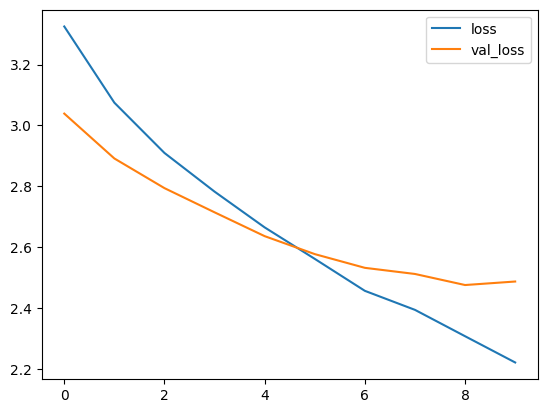

In [16]:
metrics = history.history
plt.plot(history.epoch, metrics["loss"], metrics["val_loss"])
plt.legend(["loss", "val_loss"])
plt.show()

In [17]:
test_audio = []
test_labels = []

for audio, label in test_ds:
    test_audio.append(audio.numpy())
    test_labels.append(label.numpy())

test_audio = np.array(test_audio)
test_labels = np.array(test_labels)

In [18]:
y_pred = np.argmax(model.predict(test_audio), axis=1)
y_true = test_labels

test_acc = sum(y_pred == y_true) / len(y_true)
print(f"Test set accuracy: {test_acc:.0%}")

22/22 [==============================] - 1s 16ms/step
Test set accuracy: 35%


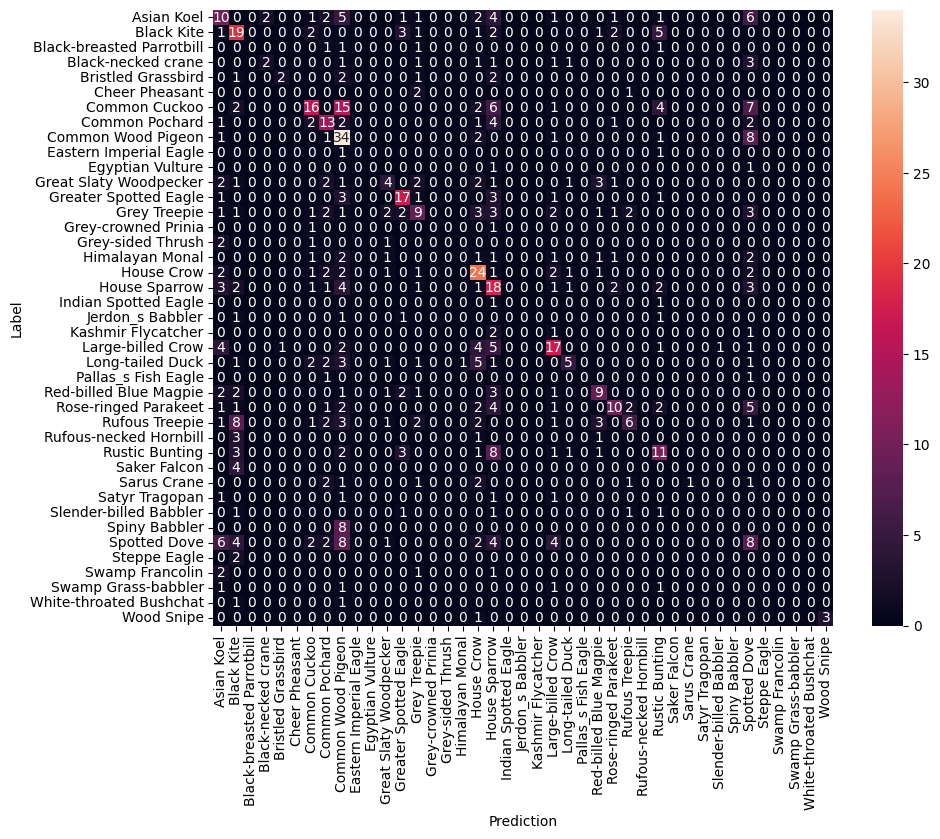

In [19]:
import seaborn as sns

confusion_mtx = tf.math.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx, xticklabels=birds, yticklabels=birds, annot=True, fmt="g"
)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.show()